# Lesson 5.分类模型决策边界与模型评估指标

在逻辑回归的算法基础内容结束之后，我们还需要补充一些关于分类摸型的基础知识，包括观察分类模型判别性能的决策边界基本的概念与实现方法，同时也包括对于分类摸型的一系列模型评估指标的基本解释与使用场景。

In [2]:
# 科学计算模块
import numpy as np
import pandas as pd

# 画图模块
import matplotlib as mpl
import matplotlib.pyplot as plt

# 自定义模块
from ML_basic_function import *

## 一、决策边界（Decision Boundary）

### 1.决策边界基本概念及核心用途

关于分类模型的模型性能判别，我们可以从模型基本理论出发来进行判别，当然也可以根据长期的实践经验来进行判断。不过除此以外，还有一种常见的、用于辅助判别分类模型的模型性能的方法，那就是绘制模型决策边界。决策边界本质上是一种可视化分类效果的方法，其基本思路也非常简单一利用训陈好的模型对样本空间所有的坐标点进行预测，然后观察样本空间所有点的不同类别之间的边界，最终就是模型的决策边界。例如，假设现在样本空间是二维空间，即数据总共只有两个特征，我们采用媒个二分类数据集训练了一个逻辑回归模型，然后我们我们借助该模型对样本空间中所有点进行预测，并且对模型判别的不同类别的点进行不同着色，最终不同颜色（也就是不同
类别）的点之间的分界线，其实就是决策边界。当然，一般来说，我们会在决策边界图像上添加参与模型训练的样本点。相关过程如下图所示：

![Alt text](image-70.png)

另外，如果从决策边界角度出发，决策边界实际上就是摸型判别样本点属于哪一类的边界，而不同颜色区域其实就是不同类别样本点所在的区域。

### 2.通过决策边界观察模型性能

当然，根据决策边界图像，其实我们就能看出模型的分类性能和对于当前样本的分类结果。例如对于上图来说，首先我们能够发现，实际上逻辑回归在二维样本空间中的决策边界是一条直线，而这种决策边界的星现"直线”的特性，会直接影响模型对于复样本的分类性能。在上述图四中能够清楚的看到，无论是红色区域的蓝色点，还是蓝色区域中红色的点，实际上都是模型错判的样本。受此限制”，逻辑回归无法处理更加复杂的判别类问题，由此我们也能看到逻辑回归本身的性能瓶颈。

![Alt text](image-71.png)

当然，并非所有模型的决策边界都呈现出线性的状态，甚至对于大多数模型来说，其决策边界都不是单独一条直线：例如对于KNN模型来说，其决策边界实际上是一个个圆圈叠加而成的拥有一定幅度的边界，而对于决策树模型来说，其决策边界实际上是一条条折线：

![Alt text](image-72.png)

很明显，从决策边界所呈现出来的不同形状，我们也能大致看出分类模型的判别效力'”，类似树模型甚至是树模型的集成模型，由于其是借助折线的决策边界来进行来进行样本类别划分，因此具备比逻辑回归更强的判别效力。

此外，有时我们还能借助决策边界观察模型过拟合倾向，一般来说，模型决策边界越不规则、越是出现不同颜色区域彼此交错的情况，则说明模型越是存在过拟合倾向。

![Alt text](image-73.png)

当然，受到平面图像呈现维度的约束，一般来说我们只能观察二维或者三维样本空间的决策边界或者决策平面，对于更高维度样本空间尽管在建模时也同样存在决策边界，但无法可视化展示。不过无论如何，在学习模型阶段，从决策边界角度理解模型性能仍然是至关重要的。接下来，我们就来简单尝试绘制逻辑回归模型的决策边界。

> 值得一提的是，对于大多数模型来说都是试图找到一条更有效的决策边界去对样本进行类别划分，但也有些模型并不会在决策边界上下功夫，而是试图去改变"样本空间，例如支持向量机SVM,就能够通过某种映射关系改变数据分布（包括数据维度），然后在新的数据分布中利用简单的决策平面或者超平面来对数据集进行切分。

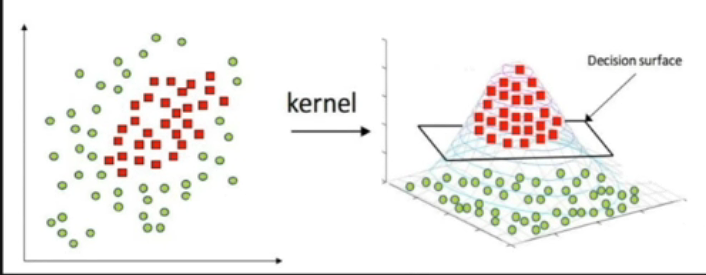

尽管在建模时也同样存在决策边界，但无法可视化展示。不过无论如何，在学习模型阶段，从决策边界角度理解模型性能仍然是至关重要的。接下来，我们就简单尝试绘制逻辑回归模型的决策边界。

### 3.逻辑回归决策边界与模型可解释性

尽管逻辑回归的"线性决策边界”一定程度约束了模型的分类效能，但线性决策边界实际上也为逻辑回归的模型可解释性提供了一个新的解释角度，例如，对于上述dispersion=6,2的逻辑回归决策边界来说，第一个特征(X轴)取值越大、或者第二个特征(Y轴)取值越大，则越有可能蓝色一类，或者说样本为蓝色类的概率就更大。

![Alt text](image-74.png)

而该现象也为解释特征之于样本类别判别的作用提供了一个新的角度。这和我们此前介绍的，从逻辑回归的线性方程系数的角度去判别特征如何影响判别类别其实是类似的，当然，正如上文所述，只有决策边界是线性时才能够进行如此解释。

### 3 逻辑回归决策边界绘制方法

#### 3.1 定义决策边界绘制函数

决策边界的绘制函数其实和Lesson 4.3 中介绍的损失函数的等高线图绘制方法类似，只是将“等高线"的绘制改成了分片区的着色。首先还是利用meshgrid函数创健区域点图

In [3]:
x1, x2 = np.meshgrid(np.arange(3), np.arange(1, 4))
[x1, x2]

[array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]),
 array([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]])]

> 回顾Lesson4.3中所介绍的内容，对于meshgridi函数生成结果，我们可以理解为第一个返回的结果为三排点的横坐标，而第二个返回结果为每个点纵坐标。所有的点是逐层排布的，每一排的点具有相同的纵坐标。实际绘图时，我们需要将这些点铺满整张画布。

然后，我们需要带入画布中的所有点进行模型预测结果输出，即需要预测画布中的海个点所属类别。虽然我们知道上述neshgrid结果实际表示的点为（0,1）、(1,1)、(2，1)，但只有将这些点转化为二维数组才能带入摸型进行训练，我们可以借助reshape方法和concatenate函数来进行相应的形变。同时，需要添加一列全是1的列在数据集的末尾，才能顺利进行逻辑回归建模预测。

In [4]:
np.concatenate([x1.reshape(-1, 1), x2.reshape(-1, 1), np.ones(shape=(9, 1))], axis=1) 

array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 1., 1.],
       [0., 2., 1.],
       [1., 2., 1.],
       [2., 2., 1.],
       [0., 3., 1.],
       [1., 3., 1.],
       [2., 3., 1.]])

接下来，将数据带入模型，即可输出预测结果。试想一下，当这些点密集的铺满画布时，我们就能够清楚的找出一条不同着色的边界。我们将上述过程封装为一个函数：

In [5]:
def logit_DB(X, w, y):
    """逻辑回归决策边界绘制函数"""

    # 以两个特征极值+1/-1为边界，并在其中添加1000个点
    x1, x2 = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 1000).reshape(-1, 1),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 1000).reshape(-1, 1))
    
    # 将所有点的横坐标转化为二维数组
    X_tem = np.concatenate([x1.reshape(-1, 1), x2.reshape(-1, 1), np.ones(shape= (1000000, 1))],axis=1)

    # 计算所有点的预测值
    y_hat_tem = logit_cla(sigmoid(X_tem.dot(w)))
    yhat = y_hat_tem.reshape(x1.shape)

    # 绘制决策边界
    plt.contourf(x1, x2, yhat, cmap=plt.cm.Spectral)

关于图像绘制部分，此处采用了plt.contourf函数。该函数和此前介绍的等高线绘制函数plt.contour函数略有区别，该函数不会标注不同区域之间的边界，取而代之的是将不同区域进行着色处理。此外，ListedColormap函数可通过输入十六进制颜色信息创建一个colormap对象，该对像可以作为plt.contourfe函数中的cmap参数，用于指定不同区域的着色。此处#EF9A9A和#90CAF9分别指代红色和蓝色，更多十六进制颜色信息可参考：htps/www.fontke.com/tool/rgb

#### 3.2 测试函数性能

接下来，测试绘图函数的函数性能